# Project Pipeline

* Collect/load data
* Clean and preprocess the data
* Use association rules mining algorithms such as Apriori or FP-Growth to identify frequent item sets, sets of items often appearing together in a transaction.
* Calculate the support and confidence for each frequent itemset, which expresses the likelihood of one item being purchased given the purchase of another item.
* Generate association rules based on the frequent itemsets and their corresponding support and confidence values. Association rules express the likelihood of one item being purchased given the purchase of another item.
* Interpret the results of the market basket analysis, identifying which items are frequently purchased together, the strength of the association between items, and any other relevant insights into customer behavior and preferences.
* Use the insights from the market basket analysis to inform business decisions such as product recommendations, store layout optimization, and targeted marketing campaigns.


### Import the necessary libraries

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=93cc554ede5f5322727f32d5922b3a10347e209ecf203aa1f8b29f069a0c72aa
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori


In [ ]:
# load data
df = pd.read_csv("/content/drive/MyDrive/Data/Market Basket Analysis - Groceries_dataset.csv")

In [ ]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


### Data Preprocessing

In [ ]:
df.shape

(38765, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
# covert the date to datetime instead of object
df.Date = pd.to_datetime(df["Date"], dayfirst = True )

In [ ]:
# remove any space incase there is any
df["itemDescription"].str.strip()

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

In [ ]:
df["itemDescription"] = df["itemDescription"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
# take a look at the member number
df.Member_number.value_counts().sum()

38765

member number seems to be unique number to each customer each time they come shoping, so it has the same number as the entry/sn

In [ ]:
# take a look at the itemDescription columns
df.itemDescription.nunique()

167

In [ ]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
df.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

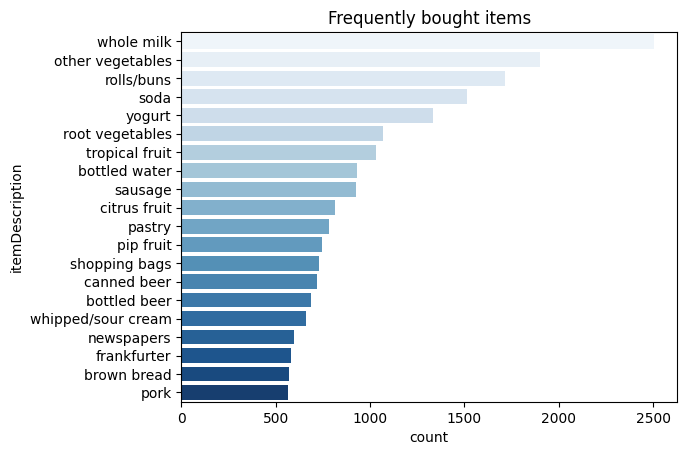

In [ ]:
# make a visualization and check for the most frequently bought
sns.countplot(df, y= df.itemDescription ,order=df.itemDescription.value_counts().iloc[:20].index, palette="Blues")
plt.title('Frequently bought items')
plt.show()


Whole milk is the most frequently bought item

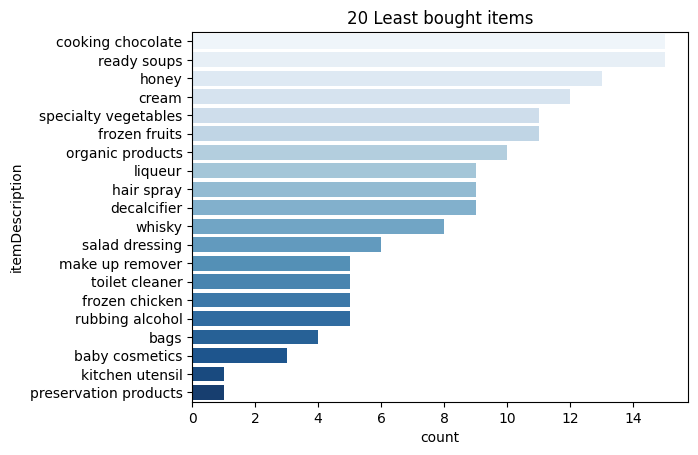

In [ ]:
# make a visualization and cehck for the least purchased items
sns.countplot(df, y= df.itemDescription ,order=df.itemDescription.value_counts().iloc[147:].index, palette="Blues")
plt.title('20 Least bought items')
plt.show()


Preservation product is the least bought item

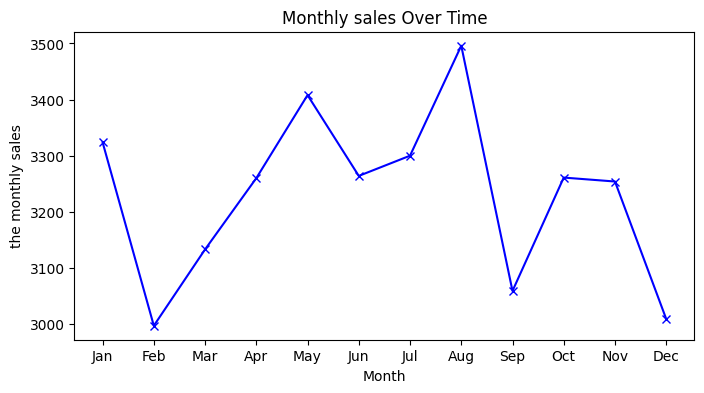

In [ ]:
# the monthly sales
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['itemDescription'].count()

# plot a line plot to check the monthly purchases
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='line', marker='x', color='Blue')
plt.title('Monthly sales Over Time')
plt.xlabel('Month')
plt.ylabel('the monthly sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



We can see that the month of August has the highest sales while february and December had the lowest sales. Sales somehow declined in December, maybe because people restocked more prior to December

In [ ]:
#combining the member_number and date to show us the items purchased in one receipt

df['single_transaction'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)

df.head()


,Member_number,Date,itemDescription,Month,single_transaction
0,1808,2015-07-21,tropical fruit,7,1808_2015-07-21
1,2552,2015-01-05,whole milk,1,2552_2015-01-05
2,2300,2015-09-19,pip fruit,9,2300_2015-09-19
3,1187,2015-12-12,other vegetables,12,1187_2015-12-12
4,3037,2015-02-01,whole milk,2,3037_2015-02-01


here we did a single trainsaction with the variable single_transaction to help combine the member number and the date to tell us the item purchased in one receipt.

In [ ]:
# we do some cross tabulation to seet the items
cross_tabulated = pd.crosstab( df["single_transaction"], df["itemDescription"], dropna = False  )

In [ ]:
cross_tabulated.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#encoding all values to 0 and 1
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

df_final = cross_tabulated.applymap(encode)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:

frequent_itemsets = apriori(df_final, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986


In [ ]:
#sorting the dataset
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False ).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553


# Recommendations

from the above analysis, these items can be placed side by side to boost sales:

* other vegetables and whole milk
* rolls/buns and whole milk
* soda and whole milk
* yogurt and whole milk
* rolls/buns and other vegetables
